In [70]:
import pandas as pd

In [71]:
df = pd.read_csv('spam_ham_dataset.csv')

In [72]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [73]:
import re

In [74]:
import nltk

In [75]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
from nltk.corpus import stopwords

In [77]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
stopwords=stopwords.words('english')

In [79]:
!pip install contractions

In [80]:
import contractions

In [82]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [83]:
import re

In [84]:
def proc_mail(x):
    #x = str(x)
    sent = []
    for i in sent_tokenize(x):
      i = re.sub("\n","",i)
      i = re.sub("\r","",i)
      i=contractions.fix(i)
      i = re.sub('(<[\w\s]*/?>)',"",i)
      i = re.sub('^((ftp|http|https):\/\/)?(www.)?(?!.*(ftp|http|https|www.))[a-zA-Z0-9_-]+(\.[a-zA-Z]+)+((\/)[\w#]+)*(\/\w+\?[a-zA-Z0-9_]+=\w+(&[a-zA-Z0-9_]+=\w+)*)?$',"url",i)
      i = re.sub('\d+',"",i)
      i = re.sub("-","",i)
      i = re.sub("\(","",i)
      i = re.sub("\)","",i)
      i = re.sub("\.","",i)
      i = re.sub("\,","",i)
      i = re.sub("\!","",i)
      i = re.sub("\:","",i)
      i = re.sub("\;","",i)
      i = re.sub("\/","",i)
      i = i.replace("#","")
      i = i.replace("'","")
      i = i.replace(u'\xa0', u' ')
      i = re.sub('(?<=")([^"]+)(?=")"', '', i)
      sent.append(i.lower())

    clnd_eml = []
    for ii in sent:
      tmp=[]
      for j in word_tokenize(ii):
        tmp.append(j)
      clnd_eml.append(tmp)
    return clnd_eml
    
    


In [85]:
def proc2_mail(x):
    #x = str(x)
    sent = []
    for i in sent_tokenize(x):
      i = re.sub("\n","",i)
      i = re.sub("\r","",i)
      i=contractions.fix(i)
      i = re.sub('(<[\w\s]*/?>)',"",i)
      i = re.sub('^((ftp|http|https):\/\/)?(www.)?(?!.*(ftp|http|https|www.))[a-zA-Z0-9_-]+(\.[a-zA-Z]+)+((\/)[\w#]+)*(\/\w+\?[a-zA-Z0-9_]+=\w+(&[a-zA-Z0-9_]+=\w+)*)?$',"url",i)
      i = re.sub('\d+',"",i)
      i = re.sub("-","",i)
      i = re.sub("\(","",i)
      i = re.sub("\)","",i)
      i = re.sub("\.","",i)
      i = re.sub("\,","",i)
      i = re.sub("\!","",i)
      i = re.sub("\:","",i)
      i = re.sub("\;","",i)
      i = re.sub("\/","",i)
      i = i.replace("#","")
      i = i.replace("'","")
      i = i.replace(u'\xa0', u' ')
      i = re.sub('(?<=")([^"]+)(?=")"', '', i)
      sent.append(i.lower())

    clnd_eml = []
    for ii in sent:
      for j in word_tokenize(ii):
        clnd_eml.append(j)
    return clnd_eml

In [86]:
df['text1']=df['text'].apply(proc_mail)

In [87]:
df['text2']=df['text'].apply(proc2_mail)

In [88]:
df['text2']

0       [subject, enron, methanol, meter, this, is, a,...
1       [subject, hpl, nom, for, january, see, attache...
2       [subject, neon, retreatho, ho, ho, we, re, aro...
3       [subject, photoshop, windows, office, cheap, m...
4       [subject, re, indian, springsthis, deal, is, t...
                              ...                        
5166    [subject, put, the, on, the, ftthe, transport,...
5167    [subject, and, following, nomshpl, can, t, tak...
5168    [subject, calpine, daily, gas, nomination, >, ...
5169    [subject, industrial, worksheets, for, august,...
5170    [subject, important, online, banking, alertdea...
Name: text2, Length: 5171, dtype: object

In [89]:
#Label=0-->Ham
#Label=1-->Spam
#df2=pd.DataFrame({'text':email_cleaned,'Label':list(df['label_num'])})

In [90]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [91]:
vocab2 = []
for ind in df.index:
  for i in df['text1'][ind]:
    vocab2.append(i)


In [92]:
import numpy as np

In [93]:
import gensim
from gensim.models import Word2Vec

In [94]:
model = Word2Vec(vocab2, min_count=1, size=100)

In [95]:
flattened_vocab = [val for sublist in vocab2 for val in sublist]

In [96]:
def trnsfrm_vec(lst):
  transformed = []
  for i in lst:
    tmp = np.zeros(100)
    count=0
    for j in i:
      if j in flattened_vocab:
        tmp += model.wv.get_vector(j)
        count += 1
      else:
        tmp += np.zeros(100)
    if (count != 0):
      transformed.append(tmp/count)
    else:
      transformed.append(tmp)

  return np.array(transformed)

       



In [97]:
def trnsfrm_vec2(lst):
  transformed = []
  tmp = np.zeros(100)
  count=0
  for i in lst:
    if i in flattened_vocab:
      tmp += model.wv.get_vector(i)
      count += 1
    else:
      tmp += np.zeros(100)
    
  return list(tmp)

 

In [98]:
#df['wv']=df['text1'].apply(trnsfrm_vec)

In [99]:
#trnsfrm_vec2(df['text2'][0])

In [100]:
df['wv2'] = df['text2'].apply(trnsfrm_vec2)

In [101]:
df

,Unnamed: 0,label,text,label_num,text1,text2,wv2
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,"[[subject, enron, methanol, meter, this, is, a...","[subject, enron, methanol, meter, this, is, a,...","[31.717839557677507, 2.8515269570052624, 28.59..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[[subject, hpl, nom, for, january, see, attach...","[subject, hpl, nom, for, january, see, attache...","[16.954579800367355, 5.3669924235437065, 3.185..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[[subject, neon, retreatho, ho, ho, we, re, ar...","[subject, neon, retreatho, ho, ho, we, re, aro...","[220.541595484945, -68.1832795960363, 325.3462..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[[subject, photoshop, windows, office], [cheap...","[subject, photoshop, windows, office, cheap, m...","[4.273417977616191, 3.417946890927851, 3.44650..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[[subject, re, indian, springsthis, deal, is, ...","[subject, re, indian, springsthis, deal, is, t...","[23.329569352325052, -13.855886809062213, 50.1..."
...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,"[[subject, put, the, on, the, ftthe, transport...","[subject, put, the, on, the, ftthe, transport,...","[56.90711079072207, 21.101586551056243, 15.699..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,"[[subject, and, following, nomshpl, can, t, ta...","[subject, and, following, nomshpl, can, t, tak...","[110.18530323775485, 42.173541460651904, 52.24..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,"[[subject, calpine, daily, gas, nomination, >,...","[subject, calpine, daily, gas, nomination, >, ...","[21.39389825743274, -7.809902112931013, 23.455..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,"[[subject, industrial, worksheets, for, august...","[subject, industrial, worksheets, for, august,...","[53.33518107398413, 15.244462654925883, 30.668..."


In [102]:
#df.wv2.str[0]

In [103]:
for i in range(100):
  df['word_'+str(i)]=df.wv2.str[i]

In [104]:
df['word_0'].dtype

dtype('float64')

In [105]:
#df['shape']=df['wv'].shape()

In [106]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num', 'text1', 'text2', 'wv2',
       'word_0', 'word_1', 'word_2',
       ...
       'word_90', 'word_91', 'word_92', 'word_93', 'word_94', 'word_95',
       'word_96', 'word_97', 'word_98', 'word_99'],
      dtype='object', length=107)

In [107]:
y=df['label_num']

In [108]:
word_cols = ['word_'+str(i) for i in range(100)]

In [109]:
X=df[word_cols]

In [110]:
X

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10,word_11,word_12,word_13,word_14,word_15,word_16,word_17,word_18,word_19,word_20,word_21,word_22,word_23,word_24,word_25,word_26,word_27,word_28,word_29,word_30,word_31,word_32,word_33,word_34,word_35,word_36,word_37,word_38,word_39,...,word_60,word_61,word_62,word_63,word_64,word_65,word_66,word_67,word_68,word_69,word_70,word_71,word_72,word_73,word_74,word_75,word_76,word_77,word_78,word_79,word_80,word_81,word_82,word_83,word_84,word_85,word_86,word_87,word_88,word_89,word_90,word_91,word_92,word_93,word_94,word_95,word_96,word_97,word_98,word_99
0,31.717840,2.851527,28.599925,-9.194441,-17.435172,-19.414459,47.285325,-12.638707,-76.592656,-52.980329,9.209862,-28.028079,15.435844,-4.254348,38.679708,38.696698,-11.480849,23.291484,41.473731,4.488538,7.780139,-13.303257,-3.326901,-5.436198,-44.179897,3.398932,8.342791,-32.386323,-61.093093,-73.113764,-21.976043,-30.538058,13.621410,-4.565231,95.094509,16.195681,10.433339,-3.644650,-39.112656,-50.649736,...,2.655347,9.804307,-60.768938,15.651474,-9.614047,-43.795543,-26.917969,58.270962,43.610677,8.425332,0.670585,-8.485290,3.376178,-15.783959,28.805007,-9.972143,-0.460721,-78.339015,-54.996680,-60.101896,20.735239,-4.364705,-20.006407,-40.612449,2.305488,-4.102298,-2.841794,-8.117547,39.184088,-2.284804,22.726121,-53.083755,-62.637135,26.764033,-53.896304,-2.599241,23.199866,-1.553805,-37.828361,-15.403803
1,16.954580,5.366992,3.185332,1.244596,1.910039,5.194413,13.178008,-10.698968,-15.120009,-19.310434,-0.571968,-9.283764,9.519303,5.017954,7.857357,5.730210,-10.033089,-4.276838,13.272896,-8.087770,11.596712,-1.198948,0.035341,0.915970,-16.042366,1.431708,-0.106576,-7.885911,-12.837284,-7.518907,9.785355,-11.190798,8.139552,-3.842298,8.356965,-0.636546,0.395563,-11.203103,-12.360002,-9.009903,...,3.304677,6.959223,-11.144420,1.345384,-8.834962,-3.984620,-1.341788,-0.183033,5.557444,-0.292451,0.125750,-2.079219,3.033582,0.610584,1.893177,-2.934180,-15.095600,-19.204890,-23.084129,-13.063034,1.996946,-15.240999,-1.911706,-9.913055,-1.597635,-0.589449,1.408710,-6.471445,18.848896,6.247121,11.780687,-7.489952,-11.392533,0.445788,-12.573230,7.243082,-0.364284,-11.161595,-4.314158,-0.680848
2,220.541595,-68.183280,325.346262,-81.910591,-277.027704,-213.258559,370.190578,-201.850635,-706.639015,-386.298314,129.433739,-172.873352,158.293218,-94.108174,218.288818,299.200385,-12.230682,331.628495,398.106895,6.996071,13.635551,-137.628025,-137.594464,-143.960159,-369.978891,-80.841524,-20.828336,-228.817961,-481.972282,-614.519387,-310.731454,-276.004402,73.324247,-47.906810,925.353118,329.937766,174.173213,67.730015,-536.127307,-701.821139,...,-102.328856,-6.893160,-582.078397,5.699177,-113.212732,-411.089855,-209.123011,686.659072,388.794749,-54.606353,-19.671049,-14.572306,208.976075,-162.434917,276.249525,-121.965798,4.536296,-747.098404,-337.887552,-339.566243,142.274556,-50.594168,-182.351662,-279.571267,99.630155,-93.758828,47.082784,102.024178,328.890500,47.673204,251.426651,-445.940865,-585.011701,145.245709,-429.362850,-124.585473,54.110587,-73.588253,-363.415091,-164.409387
3,4.273418,3.417947,3.446501,4.059140,-0.504371,-0.366536,1.722346,-4.769788,-1.981991,-5.767458,4.218354,-6.508470,0.334458,3.823319,2.011397,3.891184,-2.731904,-2.333719,-1.424520,-5.603260,0.209860,0.983562,3.629729,-2.150987,-9.119770,-0.288605,-1.836263,-4.500659,-4.886870,-5.203292,3.041342,-3.675107,2.552185,1.758853,5.122927,1.496995,4.922746,-0.959250,-7.072847,-3.776058,...,-0.723467,-1.776510,-5.685787,-1.256236,1.345050,-3.294890,2.330005,0.105694,5.244346,0.035603,-5.406570,-0.108561,2.890119,0.435280,4.557856,-4.409594,-6.393267,-2.408155,-4.215035,-5.024941,3.290911,-1.446734,-4.521184,0.610911,0.891514,0.850078,1.834984,-0.864213,3.981670,-1.062900,7.211439,-0.918678,-2.825547,3.946716,1.839148,-1.138852,2.315506,-4.455250,-3.037399,-1.411401
4,23.329569,-13.855887,50.179162,-15.449723,-43.574825,-18.303164,55.9

In [111]:
 from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [114]:
params = {'n_neighbors':[10,20,30,40,50,60,70,80,90,100], 'metric':['manhattan']}


In [115]:
knn = KNeighborsClassifier()

In [116]:

clf=RandomizedSearchCV(knn, params, random_state=123,n_jobs=-1,verbose=True)

In [117]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['manhattan'],
                                        'n_neighbors': [10, 20, 30, 40, 50, 60,
                                                        70, 80, 90, 100]},
                   random_state=123, verbose=True)

In [118]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [119]:
clf.best_score_

0.9262232258163117

In [120]:
clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 10}

In [121]:
model = KNeighborsClassifier(n_neighbors=10)

In [122]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [123]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [124]:
y_pred = model.predict(X_test)

In [125]:
accuracy_score(y_test, y_pred)

0.9432989690721649

In [126]:
from sklearn.metrics import f1_score

In [127]:
print(f1_score(y_test, y_pred))

0.8962264150943396


In [128]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

In [129]:
pred_prob = model.predict_proba(X_test)

In [130]:
fpr, tpr, thrshld = roc_curve(y_test, pred_prob[:,1])

In [131]:
import matplotlib.pyplot as plt


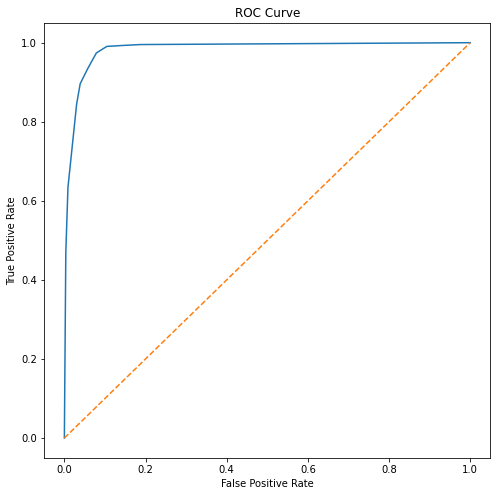

In [132]:
plt.figure(figsize=(8,8))
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [133]:
print('AUC score :', roc_auc_score(y_test, pred_prob[:,1]))

AUC score : 0.9827075388063695
